In [31]:
import jax.numpy as jnp
import networkx as nx
import matplotlib.pyplot as plt
import jax.random as jr

key = jr.PRNGKey(123)

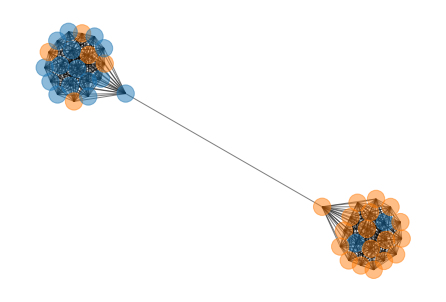

In [62]:
vertex_per_side = 20

G = nx.barbell_graph(vertex_per_side, 0) 
xs = []
ys = []
for idx, (node, subkey) in enumerate(zip(G, jr.split(key, 2*vertex_per_side))):
    if idx < vertex_per_side:
        y = jr.bernoulli(subkey, 0.8).astype(int)
    else:
        y = jr.bernoulli(subkey, 0.2).astype(int)
    G.nodes[node]['label'] = y
    xs.append(idx)
    ys.append(y)


pos = nx.spring_layout(G, seed=123)  # positions for all nodes
cols = []
for i in ys:
    if i == 0:
        cols.append('tab:blue')
    elif i == 1:
        cols.append('tab:orange')
nx.draw(G, pos, node_color=cols, with_labels=False, alpha=0.5)

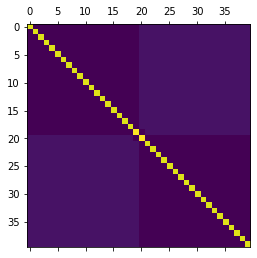

In [64]:
L = nx.laplacian_matrix(G).toarray()
plt.matshow(L)

In [65]:
evals, evecs = jnp.linalg.eigh(L)

In [67]:
evecs.shape

(40, 40)

In [70]:
evecs[1, :]

DeviceArray([ 0.15811789, -0.1588034 , -0.02223388,  0.05783375,
             -0.1323445 ,  0.1169198 , -0.09587313, -0.04353251,
              0.47599807,  0.17557251, -0.0501232 , -0.14122969,
             -0.0234772 ,  0.08416376, -0.14000538,  0.5274235 ,
              0.18825078,  0.0866656 ,  0.11848581, -0.09620807,
              0.0030113 , -0.21999437, -0.10628925, -0.20173448,
              0.0567481 ,  0.15029864, -0.09415983, -0.0505819 ,
              0.05677298, -0.11037713,  0.0394142 , -0.1407468 ,
              0.15223226,  0.07560061,  0.07293943,  0.00339341,
             -0.01684158,  0.14239992,  0.14788866, -0.03310673],            dtype=float32)

In [71]:
import tensorflow as tf

2022-02-09 09:24:02.457245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>

In [86]:
all(tf.gather_nd(tf.convert_to_tensor(evecs), tf.convert_to_tensor([1])) == tf.convert_to_tensor(evecs[1, :]))

True